In [1]:
import pandas as pd

In [2]:
sensus = {
    "tinggi":[158,170,183,191,155,163,180,158,170],
    "berat":[64,86,80,49,59,67,54,67,84],
    "jk":[
        "pria", "pria", "pria", "pria","wanita","wanita","wanita","wanita","wanita",
    ]
}
sensus_df = pd.DataFrame(sensus)

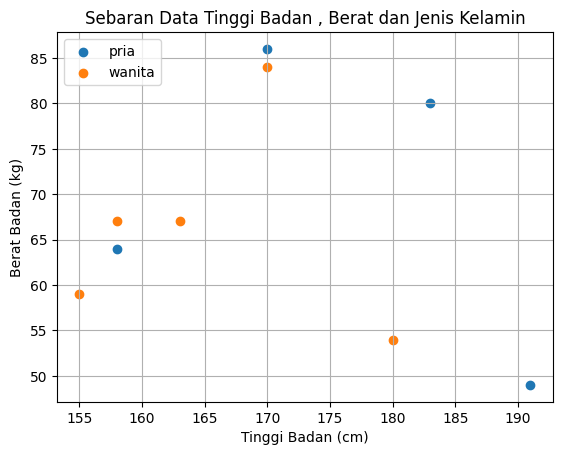

In [21]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
for jk , d in sensus_df.groupby("jk"):
    ax.scatter(d["tinggi"],d["berat"],label=jk)

plt.legend(loc="upper left")
plt.title("Sebaran Data Tinggi Badan , Berat dan Jenis Kelamin")
plt.xlabel("Tinggi Badan (cm)")
plt.ylabel("Berat Badan (kg)")
plt.grid(True)
plt.show()

In [91]:
 # Prediksi Gender ,
 # Features : Berat , Tinggi
 # Target : Gender = pria / Wanita
 
import numpy as np 
 
x_train = np.array(sensus_df[["tinggi","berat"]])
y_train = np.array(sensus_df["jk"])

In [92]:
# Normalize / Standarisasi Features and Target
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
# Result []
y_train

array([[0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1]])

In [93]:
y_train = y_train.flatten()
y_train  

array([0, 0, 0, 0, 1, 1, 1, 1, 1])

In [94]:
# Training KNN Classfication Model
from sklearn.neighbors import KNeighborsClassifier

k = 3
model = KNeighborsClassifier(n_neighbors=k)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [95]:
x_new = np.array([155,70]).reshape(1,-1)

y_new = model.predict(x_new)
y_new

array([1])

In [96]:
lb.inverse_transform(y_new)

array(['wanita'], dtype='<U6')

In [118]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report

x_test = np.array([[168 ,65],[180,96],[160,52],[169,67]])
y_test = lb.fit_transform(np.array(["pria","pria","wanita","wanita"])).flatten()
# y_test : [0, 0, 1, 1]
# result : [1 0 1 1] model predict


array([0, 0, 1, 1])

In [122]:
y_pred = model.predict(x_test)
y_pred

acc = accuracy_score(y_pred,y_test)
acc
print(y_pred)

[1 0 1 1]


In [111]:
precision = precision_score(y_pred,y_test)
precision

1.0

In [113]:
recall = recall_score(y_pred,y_test)
recall

0.6666666666666666

In [117]:
f1 = f1_score(y_pred,y_test)
f1

0.8

In [121]:
classf = classification_report(y_pred,y_test)
print(f"score:\n{classf}\n")



score:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.67      0.80         3

    accuracy                           0.75         4
   macro avg       0.75      0.83      0.73         4
weighted avg       0.88      0.75      0.77         4




In [125]:
df_2 = pd.read_csv("../../data/internet_session.csv")
df_2.dtypes

name                      object
start_time                object
usage_time                object
IP                        object
MAC                       object
upload                    object
download                  object
total_transfer           float64
seession_break_reason     object
dtype: object